---

<font size="4">**Making Business Decisions Based on Data**</font><br> 
<font size="4">**by Jacques BONA<font size="4">**

**Introduction** <br>
The goal of this project is to get an experience of  using various Data Analysis tools in  a real-life analytical case study.<br>
We will to apply some concepts such as :
* Testing Hypotheses in Business
* Choosing an Experimental Method
* Prioritizing Hypotheses
* Preparing for an A/B Test
* Analyzing the Results of A/B Tests

At the end of our study we will be able  draw some conclusions.

## <u>**Project description**</u> <br>

You are an analyst at a big online store. <br>
Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.<br>
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.


## <u>**Data description**</u> <br>

<u>**Data used in the first part of the project**</u> <br>
/datasets/hypotheses_us.csv Download dataset

* Hypotheses — brief descriptions of the hypotheses
* Reach — user reach, on a scale of one to ten
* Impact — impact on users, on a scale of one to ten
* Confidence — confidence in the hypothesis, on a scale of one to ten
* Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.


<u>**Data used in the second part of the project**</u> <br>
/datasets/orders_us.csv Download dataset
		
* transactionId — order identifier
* visitorId — identifier of the user who placed the order
* date — of the order
* revenue — from the order
* group — the A/B test group that the user belongs to

/datasets/visits_us.csv Download dataset
* date — date
* group — A/B test group
* visits — the number of visits on the date specified in the A/B test group specified


Make sure to preprocess the data. <br>
There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.


## <u>**Part 1. Prioritizing Hypotheses<u>**<br>

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each. <br>

The task is to:
* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Show how the prioritization of hypotheses changes when you use RICE instead of ICE. 
Provide an explanation for the changes.


###  <u>**Open the data file and study the general information**</u> 

In [1]:
#import librairies 
import pandas as pd
import scipy.stats as st
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#open file 
 
pd.set_option('max_colwidth', 300)
hypotheses_data = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

hypotheses_data
 
 

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
hypotheses_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#percentage of missing values for each category in %

(hypotheses_data.isna().sum())/len(hypotheses_data)*100

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Effort        0.0
dtype: float64

In [5]:
hypotheses_data.duplicated().sum()

0

In [6]:
#changing format column titles 
hypotheses_data.columns = hypotheses_data.columns.str.lower()

The data provided was  adequate.We have 5 columns and 9 entries.<br>
There is no missing data nor duplicates values.<br>
We can now prioritise the hypotheses.

###  <u>**Prioritization of hypotheses**</u> 

#### <u>**Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority**</u> 

ICE (Impact, Confidence, and Ease of implementation) is a framework for taking all the ideas your team has for growing your company, and prioritizing them using data : it is one of the most popular ways of prioritizing problems<br>


In [7]:
#formula applied
pd.set_option('max_colwidth', 300)
hypotheses_data['ICE'] = ((hypotheses_data['impact'] * hypotheses_data['confidence']) / hypotheses_data['effort']).round(1)
#sort data 
hypotheses_data.sort_values(by='ICE', ascending=False)


,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0


**The hypothese 8: 'Launch a promotion that gives users discounts on their birthdays' has the highest ratio ICE and is the most promising followed by hypotheses 0 and 7**

#### <u>**Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority. Sort them in descending order of priority**</u> 

The RICE scoring model is a framework designed to help product managers determine which products, features, and other initiatives to prioritize on their roadmaps by scoring these items according to four RICE factors:
* Reach
* Impact
* Confidence
* Effort

In [8]:
#formula applied
pd.set_option('max_colwidth', 300)
hypotheses_data['RICE'] = (hypotheses_data['reach'] * hypotheses_data['impact'] * hypotheses_data['confidence']) / hypotheses_data['effort']
#sort data 
hypotheses_data.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


**The hypothese 7: 'Add a subscription form to all the main pages. This will help you compile a mailing list' has the highest ratio RICE and is the most promising followed by hypotheses 2 and 0** <br>
With this calculation we find again hypotheses 0 and 7 in the top 3.

#### <u>**Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.**</u> 

In [9]:
pd.set_option('max_colwidth', 300)
display(hypotheses_data.sort_values("ICE",ascending=False)[["hypothesis", "ICE"]])
print('-------------------------------------------------------------------------------------------------')
hypotheses_data.sort_values("RICE",ascending=False)[["hypothesis", "RICE"]]

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.0
1,Launch your own delivery service. This will shorten delivery time,2.0
5,Add a customer review page. This will increase the number of orders,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.1
4,Change the background color on the main page. This will increase user engagement,1.0


-------------------------------------------------------------------------------------------------


,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


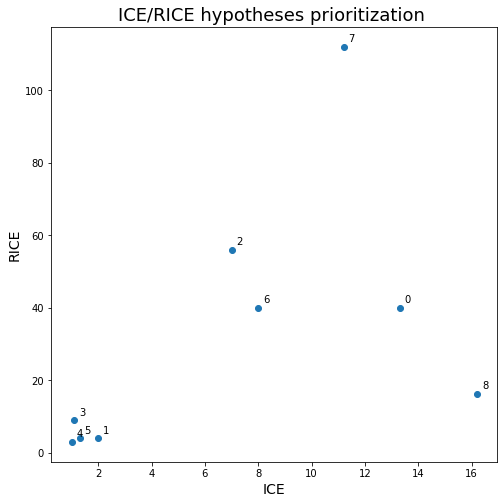

In [10]:
#scatter plot ICE/RICE hypotheses
fig, ax = plt.subplots(figsize=(8,8))
x =  hypotheses_data.ICE.values 
y =  hypotheses_data.RICE.values
ax.scatter(x,y)
hypotheses_data.sort_index()
 

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE/RICE hypotheses prioritization ', fontsize=18)

for i, txt in hypotheses_data.iterrows():
    ax.annotate(txt.name, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
     

Clearly the two methods give us different inputs with 2 distinct top 3 :<br>
**ICE:**
* hypothese 8 
* hypothese 0
* hypothese 7

**RICE:**
* hypothese 7
* hypothese 2
* hypothese 0

We notice that the hypothese 0 and 7 are in both top 3 which means that they are the most promising whatever method we have been using.<br>
If the hypothese 7 is  the number one with the RICE method it 's because of its REACH parameter is 10 while the other have lower values.<br>
If the hypothese 0 is  the number one with the ICE method it 's because of  its IMPACT and CONFIDENCE parameters are respectively 10 and 8  while the other have lower values.<br>

It seems that the hypotheses 8 and 2 fell  in the ranking overall because of the low reach and impact they have.<br>

Hypotheses 1,3,4,5 are out of the picture whatever method we have applied.<br>

What is important is to pay attention to the relative position of the hypothese rather than just focusing on the absolute scoring which depends on the calculation and can vary from method to method.<br>
We have to take into account the number of people that will be affected by the hypotheses independently from how strong the hypothesis can be.



## <u>**Part 2. A/B Test Analysis<u>**<br>


You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.<br>

<u>**Analyze the A/B test:</u>**
* Graph cumulative revenue by group. Make conclusions and conjectures.
* Graph cumulative average order size by group. Make conclusions and conjectures.
* Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.<br>

<u>**Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.</u>**
* Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
* Plot a scatter chart of the number of orders per user. Make conclusions and conjectures<br>
    
<u>**Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.</u>**
* Plot a scatter chart of order prices. Make conclusions and conjectures.
    
<u>**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.</u>**
* Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.<br>
* Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.<br>
* Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.<br>
* Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.<br>
* Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.<br>

###  <u>**Open the data file and study the general information**</u> 

In [11]:
#opening and reading file orders
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
#checking info 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
#check missing values 
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
#check duplicated values 
orders.duplicated().sum()

0

The orders file has 1197 entries and 5 columns.
We do not have any duplicate nor missing values but the format of columns title is not using the appropriate syntax and we need also to amend the format of the date from string to pd.datetime.

In [15]:
#data preparation :orders
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.date = pd.to_datetime(orders.date)
display(orders.head())
print('----------------------------------------------')
orders.tail(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


----------------------------------------------


,transaction_id,visitor_id,date,revenue,group
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [16]:
#opening and reading file visits
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')
display(visits.head())
print('----------------------------------------------')
visits.tail()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


----------------------------------------------


,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [17]:
#checking info 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
#check missing values 
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [19]:
#check duplicated values 
visits.duplicated().sum()

0

The visists file has 62 entries and 3 columns.
We do not have any duplicate nor missing values but the format but we need also to amend the format of the date from string to pd.datetime

In [20]:
#data preparation :visits
visits.date = pd.to_datetime(visits.date)


###  <u>**A/B test preparation**</u> 

In [21]:
#check if there are errors in the original datasets where visitors might have gotten into both group A and group B.

total_visitors = (orders
              .groupby(['group', 'visitor_id'], as_index=False)
              .agg({'transaction_id': 'nunique'})
              .rename(columns={'transaction_id': 'nb_of_transactions'}))

total_visitors.sample(15)

,group,visitor_id,nb_of_transactions
170,A,1460891116,1
85,A,793112967,1
102,A,907970812,1
947,B,3218863961,1
595,B,623318263,1
715,B,1577719542,1
281,A,2507107988,1
474,A,4017075195,1
284,A,2561350211,1
878,B,2686716486,1


In [22]:
#Filter vistors in 2 groups A and B
total_visitors_A = total_visitors[total_visitors.group == 'A'][['visitor_id', 'nb_of_transactions']]
total_visitors_B = total_visitors[total_visitors.group == 'B'][['visitor_id', 'nb_of_transactions']]
visitors_mixing = total_visitors_A.merge(total_visitors_B, on='visitor_id', how='inner',
                                         )
visitors_mixing = visitors_mixing.rename(columns={'nb_of_transactions_x': 'transaction_A', 'nb_of_transactions_y': 'transaction_B'})
display(visitors_mixing.sample(10))
print('number of visitors in 2 groups A and B:', visitors_mixing['visitor_id'].count())

,visitor_id,transaction_A,transaction_B
7,457167155,1,3
28,2579882178,1,1
30,2600415354,1,1
18,1614305549,3,1
47,3941795274,1,1
57,4266935830,1,1
5,351125977,1,1
26,2378935119,4,5
38,2954449915,1,1
39,3062433592,1,4


number of visitors in 2 groups A and B: 58


In [23]:
#check percentage of visitor in 2 groups 
print('percentage of visitor in 2 groups : {:.1f}'.format(
    visitors_mixing['visitor_id'].count()  / orders.visitor_id.nunique() * 100))

percentage of visitor in 2 groups : 5.6


we have around 6 % of visitors in both group which will affect the outcome of the study , we need to delete them.

In [24]:
#create list of bad visitor_id
visitors_mixing_bad = visitors_mixing.visitor_id.tolist()
#remove bad visitor_id from dataframe order with np.logical_not to pick a subset of rows  matching several conditions.
orders = orders[np.logical_not(orders.visitor_id.isin(visitors_mixing_bad))]
print('updated total number of visitors_id:', orders.transaction_id.nunique())

updated total number of visitors_id: 1016


 Let's make a new DataFrame with cumulative data:

In [25]:
datesGroups = orders[['date', 'group']].drop_duplicates()

# getting aggregated cumulative daily data on orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [26]:
# getting aggregated cumulative daily data on visitors
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x
['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' :
 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=
['date', 'group'])


In [28]:
#Rename columns 
cumulativeData = cumulativeData.rename(columns={'transaction_id': 'nb_of_orders', 'visitor_id': 'nb_of_buyers','visits':'nb_of_visitors'})

In [29]:
cumulativeData.sample(15)

,date,group,nb_of_orders,nb_of_buyers,revenue,nb_of_visitors
48,2019-08-25,A,380,362,41139.5,14943
0,2019-08-01,A,23,19,2266.6,719
52,2019-08-27,A,419,400,46539.0,16376
20,2019-08-11,A,181,169,17084.9,6980
1,2019-08-01,B,17,17,967.2,713
49,2019-08-25,B,440,424,67393.8,15127
13,2019-08-07,B,135,132,14392.7,4644
25,2019-08-13,B,249,244,24491.3,8310
33,2019-08-17,B,320,314,34116.2,10434
4,2019-08-03,A,66,60,5550.1,1845


###  <u>**A/B test analysis**</u> 

#### <u>**Graph cumulative revenue by group**</u> 

We are going to plot cumulative revenue graphs by day for A/B test group

In [30]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'nb_of_orders']]
cumulativeRevenueA.sample(15)

,date,revenue,nb_of_orders
20,2019-08-11,17084.9,181
12,2019-08-07,10234.0,130
18,2019-08-10,16121.5,170
36,2019-08-19,32389.3,299
58,2019-08-30,52363.7,460
42,2019-08-22,37455.1,339
24,2019-08-13,24630.6,214
8,2019-08-05,7623.6,99
50,2019-08-26,43604.3,396
14,2019-08-08,11638.8,144


In [31]:
# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'nb_of_orders']]
cumulativeRevenueB.sample(15)

,date,revenue,nb_of_orders
57,2019-08-29,74576.7,510
3,2019-08-02,3535.3,40
55,2019-08-28,72895.5,495
7,2019-08-04,6138.5,68
5,2019-08-03,4606.9,54
1,2019-08-01,967.2,17
27,2019-08-14,26183.7,263
19,2019-08-10,20103.6,198
29,2019-08-15,31033.2,289
33,2019-08-17,34116.2,320


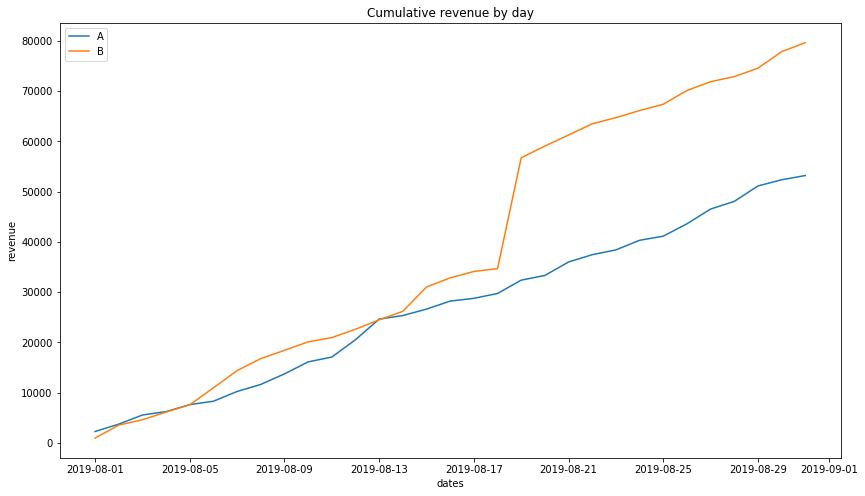

In [32]:
# Plotting the group A revenue graph
plt.figure(figsize = (14,8))
plt.title('Cumulative revenue by day')
plt.xlabel('dates')
plt.ylabel('revenue')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show();

We can see there is quite a steady rising of the revenue during the test which can be interpretated as a good sign.<br>
We notice a spike especially for group B around the 18/8/2019 where it took the lead, which can demonstrate either a potential surge in the number of orders or the presence of very expensive orders in the sample. 

#### <u>**Graph cumulative average order size by group.**</u> 

We are going to plot cumulative average order size by group for A/B test group

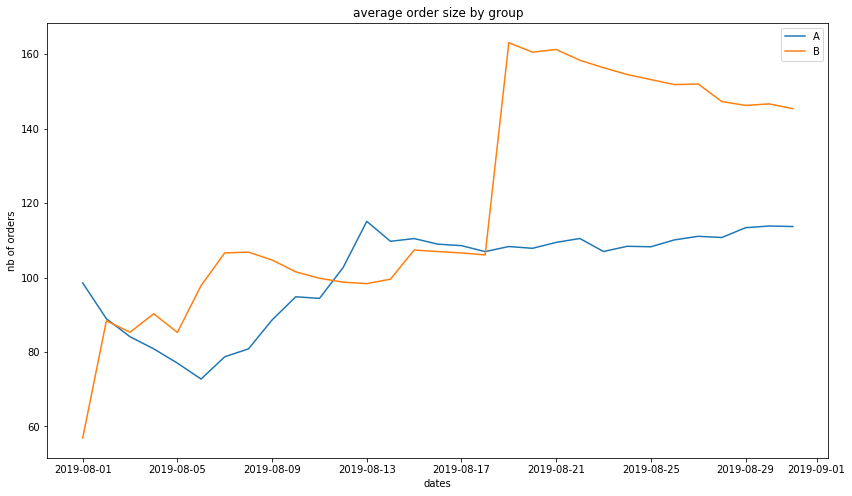

In [33]:
# To plot average purchase size by group. We'll divide cumulative revenue by the cumulative number of orders.
plt.figure(figsize = (14,8))
plt.title('average order size by group')
plt.xlabel('dates')
plt.ylabel('nb of orders')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['nb_of_orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['nb_of_orders'], label='B')
                                                                                      
plt.legend()
plt.show();

We observe a surge in group B around 18/8/2019 that may be related to the presence of large, expensive orders.<br>
By the end of the test it stabilizes for group A.<br>
We need to investigate further to find the real causes.<br>

#### <u>**Graph the relative difference in cumulative average order size for group B compared with group A.**</u> 
We are going to plot a relative difference graph for the average order sizes.
We'll add a horizontal axis with the axhline() method .

In [34]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on
='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.sample(15)

,date,revenueA,nb_of_ordersA,revenueB,nb_of_ordersB
3,2019-08-04,6225.6,77,6138.5,68
6,2019-08-07,10234.0,130,14392.7,135
0,2019-08-01,2266.6,23,967.2,17
8,2019-08-09,13734.0,155,18428.8,176
27,2019-08-28,48065.9,434,72895.5,495
18,2019-08-19,32389.3,299,56749.6,348
28,2019-08-29,51134.8,451,74576.7,510
9,2019-08-10,16121.5,170,20103.6,198
11,2019-08-12,20533.7,200,22616.8,229
7,2019-08-08,11638.8,144,16772.6,157


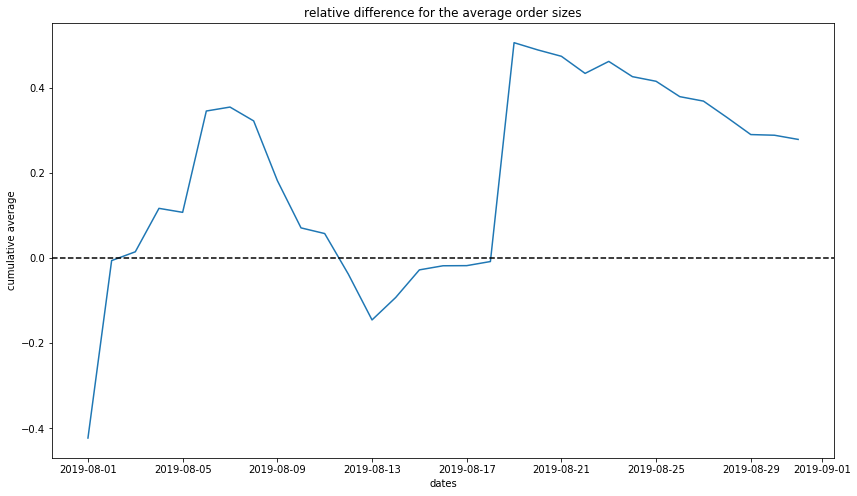

In [35]:
# plotting a relative difference graph for the average order sizes
plt.figure(figsize = (14,8))
plt.title('relative difference for the average order sizes')
plt.xlabel('dates')
plt.ylabel('cumulative average')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['nb_of_ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['nb_of_ordersA'])-1)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

We observe different segments of spikes laregly influenced by group B throught the test which indicates probably the presence of outliers and large orders.

#### <u>**Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.**</u> 
We'll analyze the cumulative conversion.

In [36]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['nb_of_orders']/cumulativeData['nb_of_visitors']


In [37]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


In [38]:
# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

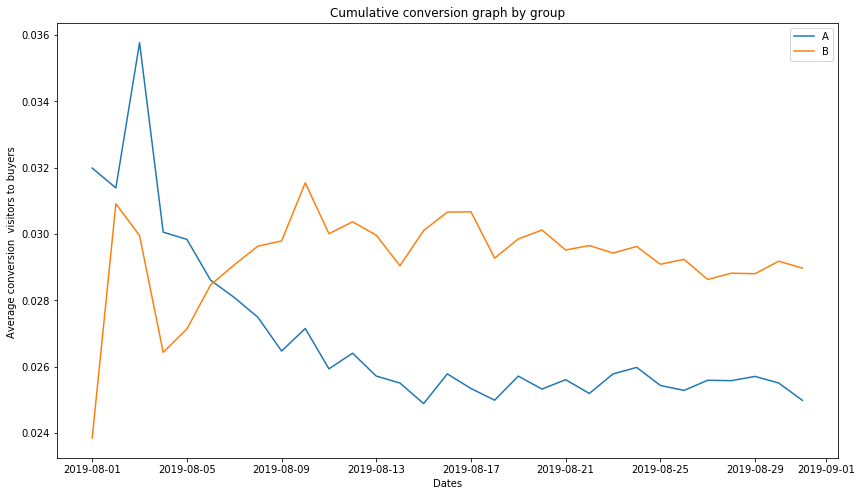

In [39]:
# plotting the visualization 
plt.figure(figsize = (14,8))
plt.title('Cumulative conversion graph by group')
plt.xlabel('Dates')
plt.ylabel('Average conversion  visitors to buyers ')

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show();

The groups were fluctuating and then the conversion rate of group B rose to surpass consistently the conversion rate of group B.


#### <u>**Relative difference graph for the cumulative conversion rates.**</u>  

In [40]:
#merge convertsion tables 

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.sample(15)


,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
13,2019-08-14,0.025502,0.029042
15,2019-08-16,0.025779,0.030660
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134
12,2019-08-13,0.025712,0.029964
29,2019-08-30,0.025503,0.029179
6,2019-08-07,0.028084,0.029070
9,2019-08-10,0.027148,0.031544
17,2019-08-18,0.024984,0.029272


No handles with labels found to put in legend.


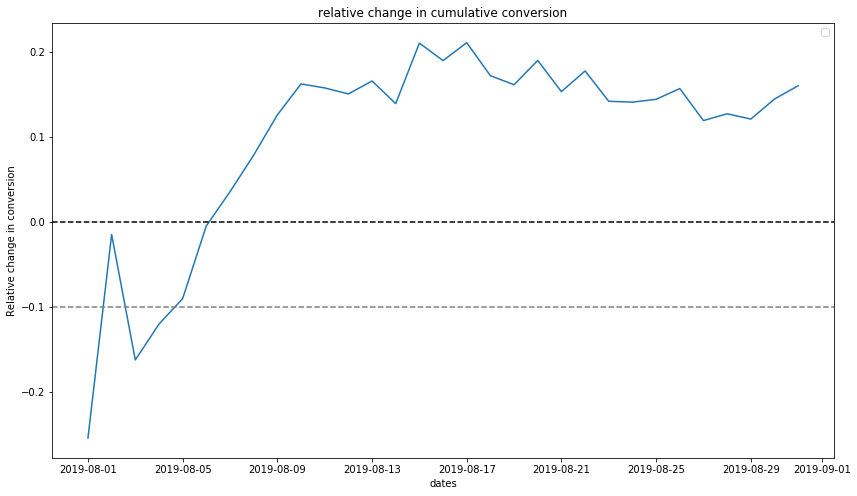

In [41]:
#plot graph 
plt.figure(figsize = (14,8))
plt.title('relative change in cumulative conversion')
plt.xlabel('dates')
plt.ylabel('Relative change in conversion')


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

We observe that at the beginning of the test the group B was behind and around the 9/8/2019 it took the lead continuously. <br>
We need to  have a look at the anomalies that are distorting the results in order to see if we can draw some conclusions. 

#### <u>**Plot a scatter chart of the number of orders per user.**</u>  
We need to keep in mind that users who place many orders inflate the numerator when we calculate conversion. <br>
Therefore their behavior probably differs from the normal pattern.

In [42]:
orders.sample(15)


,transaction_id,visitor_id,date,revenue,group
769,3257317835,1224575308,2019-08-21,10.1,A
395,2552819381,678354126,2019-08-28,15.5,A
1,2804400009,3642806036,2019-08-15,15.2,B
234,699854005,3391919803,2019-08-23,40.7,B
623,1576403126,3956892867,2019-08-29,45.1,A
201,1826741120,471842048,2019-08-23,30.7,B
971,4042759961,3686264987,2019-08-08,10.7,B
1067,3291040387,1263373242,2019-08-12,70.2,B
248,1598128055,238992583,2019-08-18,15.6,A
168,2065527789,1581167209,2019-08-01,30.4,A


In [43]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['user_Id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

        user_Id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


There are users with 3, 2 orders. 
Let's plot a distribution histogram with the number of orders per user.


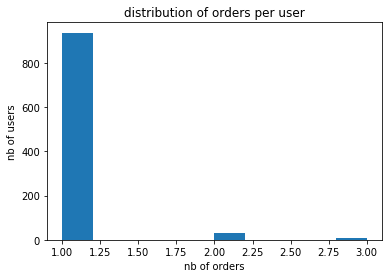

In [44]:
#distribution histogram
plt.title('distribution of orders per user')
plt.xlabel('nb of orders')
plt.ylabel('nb of users')



plt.hist(ordersByUsers['orders']);


We can see that the majority of customers place only one order, we have some outliers with 2 and 3 orders.
Let's plot a scatter chart with the number of orders per user.

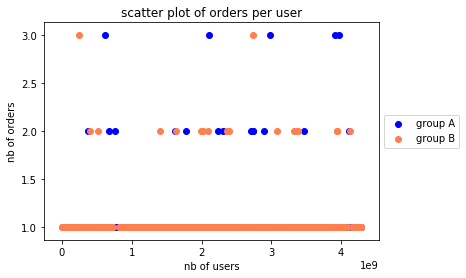

In [45]:
#building scatter plot
visitors_orders_A = orders[orders.group=='A'].groupby('visitor_id')['transaction_id'].nunique()
visitors_orders_B = orders[orders.group=='B'].groupby('visitor_id')['transaction_id'].nunique()


plt.scatter(visitors_orders_A.index, visitors_orders_A, color='blue')
plt.scatter(visitors_orders_B.index, visitors_orders_B, color='coral')

plt.title('scatter plot of orders per user')
plt.xlabel('nb of users')
plt.ylabel('nb of orders')
plt.legend(["group A" , "group B"],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


So far our conclusions are confirmed: there are few users  with two and three orders. <br>
At this stage it doesn't seem abnormal to have 2 to three orders per month but it is still not very clear 
whether we should consider them as anomalies or not.

###  <u>**Analyzing Outliers and Surges: Extreme Values**</u>  

During  our A/B test analysis we identified some outliers/anomalies, which can distort the results of our A/B test.<br>
An anomaly is defined as the value that appears rarely in a statistical population but can introduce error when it does.<br>
To detect anomalies, we'll need to analyze the 95,  and 99 percentiles.

#### <u>**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**</u>

In [46]:
print(np.percentile(ordersByUsers['orders'], [ 90,95, 99]))

[1. 1. 2.]


No more than 1% of users placed more than 2 or 3 orders. <br>
We didn't identify more than 3 orders per user.<br>
Thus,there is no need  to filter further anomalies.

In [47]:
#we could also identify the exact number of users in the order's distribution 
visitors_orders_dis= orders.groupby('visitor_id')['transaction_id'].nunique()
visitors_orders_dis.sample(10)


visitor_id
2067508917    1
3815257471    1
1554533732    1
3310105714    1
4100747010    1
3419266314    1
3077470899    1
3281496343    1
2582702340    1
1303698307    1
Name: transaction_id, dtype: int64

In [48]:
#group distribution
(visitors_orders_dis.value_counts())

1    937
2     29
3      7
Name: transaction_id, dtype: int64

We have 937 users with 1 order , 29 with 2 orders and 7 with 3 orders.

#### <u>**Plot a scatter chart of order prices.**</u>

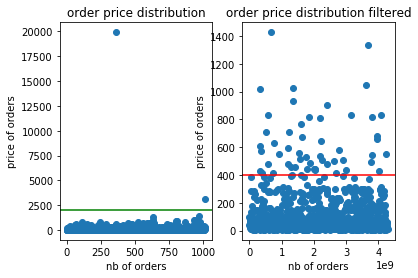

In [49]:
#scatter plot of order price distributioner prices.
plt.subplot(1,2,1)
plt.axhline(2000, color='green', ls='-')
plt.xlabel('nb of orders')
plt.title('order price distribution')
plt.ylabel('price of orders')

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

#second plot where we remove the outliers limit price 2000
plt.subplot(1,2,2)
y_values = orders[orders.revenue <= 2000]
plt.title('order price distribution filtered')
plt.axhline(400, color='red', ls='-')
plt.xlabel('nb of orders')
plt.ylabel('price of orders')
plt.scatter(y_values.transaction_id, y_values.revenue);



We don't see many orders that cost more than 2000.<br>
There are outliers at 2500 and 200 000.<br> 
The order at 200 000 seems very extreme.<br>
When we remove the outliers we can see that most of orders cost less than 400.

<div class="alert alert-info"> 
<b>Corrected</b> 

#### <u>**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**</u>

In [50]:
#We are going to use the np.percentile() method.
print(np.percentile( orders['revenue'], [ 90,95, 99])) 
 

[280.8   414.275 830.3  ]


95% of users placed orders that cost not more than 415 and not more than 1% placed orders that cost more than 831.
The abnormal point would be 800.

## <u>**Testing the Hypothesis that Proportions Are Equal**<br>

### <u>**Find the statistical significance of the difference in conversion between the groups using the raw data.**<br>


In [51]:
#creation of variables ordersByUsersA to store the columns ['user_Id', 'orders']. 
#For users with at least one order, we'll indicate the number of orders made.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_Id', 'orders']
ordersByUsersA.sample(10)

,user_Id,orders
358,3295038680,1
201,1981624632,1
36,366673373,2
284,2736682487,1
35,358944393,1
297,2871453277,1
343,3213223594,1
174,1687231984,1
183,1830791924,1
223,2188683977,1


In [52]:
#creation of variables ordersByUsersB to store the columns ['user_Id', 'orders']. 
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_Id', 'orders']
ordersByUsersB.sample(10)

,user_Id,orders
271,2146711261,1
477,3874092616,1
342,2669052850,1
103,728063420,1
506,4100747010,1
334,2614516882,1
410,3288820196,1
469,3812442168,1
317,2476105225,1
268,2128962954,1


In [53]:
# creation of variables sampleA and sampleB, with users from different groups and corresponding numbers of orders
#those who didn't order anything will have 0
#a sample has 2 parts 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleA.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

In [54]:
#Here's what we get after doing the same with sampleB
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

For this purpose we will use the Mann-Whitney test.<br>
Formulation of Hypotheses :<br>
* **H0: there is no difference in conversion between groups A and B: conversion group A = conversion group B**<br>
* **H1: there are differences in conversion between groups A and B : conversion group A ≠ conversion group B**<br>

We will consider : α Alpha - standard : 5%.

p-value<α ⇒ reject H0 <br>
p-value≥α ⇒ fail to reject H0

In [107]:
#Let's apply the criterion and format the p-value by rounding it to three decimal places.
#To get the group's conversion rate, we'll need to divide the sum of the orders by the number of users.
#Using the mean() method, we'll find the mean for sampleA and sampleB. 
alpha= 0.05 # significance level 

results = st.mannwhitneyu(sampleA, sampleB[1],alternative="two-sided")
print("p-value:{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("conversion rate:{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value:0.006
conversion rate:0.160
Null hypothesis rejected: the difference is statistically significant


There are differences in conversion between groups A and B : conversion group A ≠ conversion group B.<br>
The first row of the output gives us the p-value, 0.006, which is less than 0.05. So we rejected the null hypothesis that there was  not a statistically significant difference in conversion between the groups. <br>
Conversion in group B is on average 16% higher.<br>


### <u>**Find the statistical significance of the difference in average order size between the groups using the raw data.**<br>
    
In order to calculate the statistical significance of the difference in average order size between the groups, we'll pass the data on revenue to the mannwhitneyu() criterion.<br>
We are going to find also find the relative difference in average order size between the groups.<br>



For this purpose we will use the Mann-Whitney test.
Formulation of Hypotheses :

* **H0: there is no difference in average order size between the groups A and B using the raw data=> average order size group A = average order size group B**

* **H1: there are differences in average order size between the groups A and B using the raw data=> average order size group group A ≠ average order size group group B**

* We will consider : α Alpha - standard : 5%.

* p-value<α ⇒ reject H0
* p-value≥α ⇒ fail to reject H0

In [147]:
alpha= 0.05 # significance level 

 

samplea=orders[orders['group']=='A']['revenue']
sampleb=orders[orders['group']=='B']['revenue'] 

result='{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1],alternative="two-sided")
print('p-value:',result)

print('difference  in average order size :{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



p-value: 0.431
difference  in average order size :0.278


The p-value is way higher than 0.05, we failed to reject the null hypothesis: we can't make conclusions about the difference" despite the average order size for group B being 27% much larger than it is for group A in raw data.

### <u>**Find the statistical significance of the difference in conversion between the groups using the filtered data.**<br>
    
Let's define anomalous users as those who place more than 1 order or one order bigger than 2499.<br>
Thus we'll remove the users with the largest numbers of orders and the users with the most expensive orders. <br>
Let's make data slices with the users who placed more than one order (usersWithManyOrders) and the users who placed orders for more than 2499(usersWithExpensiveOrders).<br>
We'll join them in a table called abnormalUsers.<br>
Let's find the total number of anomalous users using the shape() method.<br>
    

In [149]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['user_Id'], ordersByUsersB[ordersByUsersB['orders'] > 1]['user_Id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 2499]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print('Nb of  users with abnormal behavior;',abnormalUsers.shape)

Nb of  users with abnormal behavior; (38,)


We have 38 anomalous users in total.We need now to find out how their actions have affected the test results.<br>
We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data.  



In [150]:
#we  prepare samples of the number of orders per user for each test group:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_Id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_Id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

**Formulation of Hypotheses:**<br>

* **H0: there is no difference in conversion between groups A and B using the filtered data: conversion group A = conversion group B**<br>
* **H1: there are differences in conversion between groups A and B using the filtered data: conversion group A ≠ conversion group B**<br>
* We will consider : Alpha - standard : 5%.<br>
    
* p-value<α ⇒ reject H0
* p-value≥α ⇒ fail to reject H0

In [151]:
#we apply the statistical Mann-Whitney criterion to the resulting samples
sampleAFiltered 

sampleBFiltered
alpha= 0.05 # significance level 


print("p-value {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],alternative="two-sided"))
print("conversion rate:{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))




p-value 0.006
conversion rate:0.178


The results for conversion almost didn't change much from the raw data with same p-value and a higher conversion rate.<br>
The difference is statistically significant  in conversion between the groups using the filtered data.

### <u>**Find the statistical significance of the difference in average order size between the groups using the filtered data.**<br> 

For this purpose we will use the Mann-Whitney test.<br>
**Formulation of Hypotheses:**

* **H0: there is no difference in average order size between the groups A and B using the filtered data.
=> average order size group A = average order size group B**

* **H1: there are differences in average order size between the groups A and B using  the filtered data.
=> average order size group group A ≠ average order size group group B**

* We will consider : α Alpha - standard : 5%.

* p-value<α ⇒ reject H0

* p-value≥α ⇒ fail to reject H0

In [175]:
    
print('p-value:{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1],alternative="two-sided"))

print('average order size for group B:{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(
    orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))


p-value:0.425
average order size for group B:-0.066


The p-value is way higher than 0.05, we failed to reject the null hypothesis: we can't make conclusions about the difference" despite the average order size difference of 6%.<br>
We can see that even if our conclusions from the A/B test didn't change much , this example reveals clearly how anomalies can have an impact on A/B test results!<br>

## <u>**Make a decision based on the test results**<br>
The possible decisions are:
* 1. Stop the test, consider one of the groups the leader. 
* 2. Stop the test, conclude that there is no difference between the groups. 
* 3. Continue the test.

We can sum up the findings as such :<br>

* Raw and filtered data revealed  some difference in conversion between the groups where conversion in group B is on average higher.<br>
The graph showing the Cumulative conversion by group tells us that group B's results are surpassing group A  consistently and  the trend doensn't seem to change  significantly in the future.<br>

* Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.<br>

**For those reasons we can conclude that the test was successful and should be stopped.<br>
We consider the group B as leader and there is no need to continue the test since the probability that the group A  will turn to be better is unlikely to happen.**

## <u>**General conclusion**<br>

Prior to start our study it was essential to amend the titles of the columns so they can be standardized according to python syntax.<br>
There was no missing data nor duplicated values and the data format  provided was overall correct.<br>

In comparison to  ICE and RICE , we have noticed that 2 hypotheses fell in the ranking because of the low reach and impact they have:
* Add product recommendation blocks to the stores site.This will increase conversion and average purchase size<br>

* Launch a promotion that gives users discounts on their birthdays<br>

In the other end 2 hypotheses stood out  and need to be investigated:
* Add two new channels for attracting traffic. This will bring 30% more users<br>

* Add a subscription form to all the main pages. This will help you compile a mailing list<br>


We found 5 % of  users  present simultaneously in 2 groups which would distort later the outcome of the study that's why we deleted them from the file orders.<br>

During the A/B analysis  we observed  a steady rising of the revenue  especially for group B around the 18/8/2019  which can be interpretated as a good sign.<br>

Further calculations enabled us to identify the outliers.
We didn't find any users with more than 3 orders which is not as abnormal in this case ,there is no need to filter  out further as the  goal is not to exclude potential loyal and good cutomers.
We also managed to  set a limit for the big orders above 800 which accounts for less than 5%.<br>

Statistical significance using the method  Mann-Whitney confirmed that there were differences in conversion between groups A and B but no statistically significant differences were found in average order size between the groups.<br>


Finally we can conclude that the A/B  test is  successful as we observed  a stable and statistically significant increase in the conversion of visitors to buyers which therefore  indicates  a growth in revenue.
 

